In [1]:
import numpy as np
import pandas as pd
import pickle as pkl

import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams

# Load data

## Load first dict

In [3]:
with open('Data/dict.pkl', 'rb') as f:
    tokenization_dict = pkl.load(f)

## Load Learn

In [4]:
with open('Data/Learn/labels.pkl', 'rb') as f:
    labels = pkl.load(f)

with open('Data/Learn/sentences.pkl', 'rb') as f:
    sentences_dict = pkl.load(f)

with open('Data/Learn/sequences.pkl', 'rb') as f:
    sequences_dict = pkl.load(f)

## Load Test

In [5]:
with open('Data/Test/sentences.pkl', 'rb') as f:
    test_sentences_dict = pkl.load(f)

with open('Data/Test/sequences.pkl', 'rb') as f:
    test_sequences_dict = pkl.load(f)

# Quick exploration

* Size
* Head
* Target distribution
* Train Test comparison

## Explore Train and Test datasets

In [6]:
labels = pd.Series(labels)

In [7]:
print('Size of Train data: ')
print(len(labels))

print('----')
print('Target Distribution: ')
print(labels.value_counts() * 100.0 / labels.shape[0])

Size of Train data: 
45930
----
Target Distribution: 
C    86.897453
M    13.102547
dtype: float64


Text(0.5, 1.0, 'Dataset Sizes')

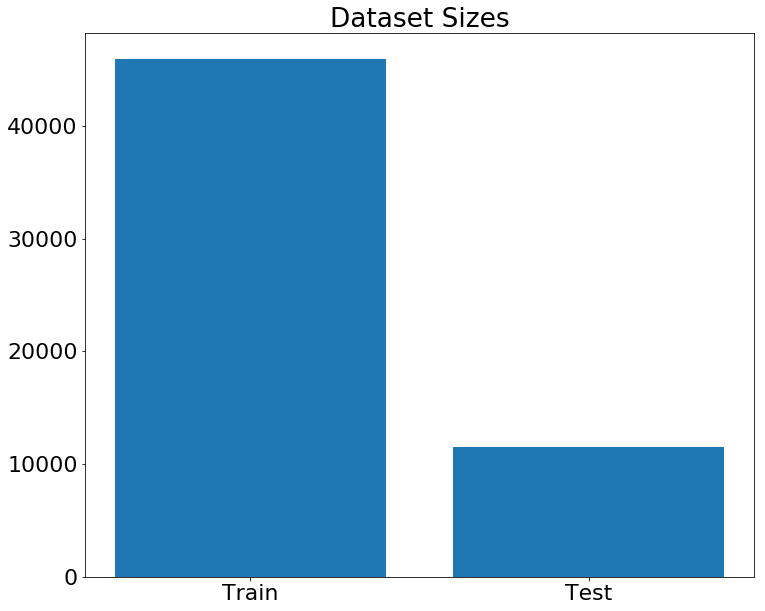

In [8]:
rcParams['figure.figsize'] = 12, 10
mpl.rcParams.update({'font.size': 22})

plt.bar(x=['Train', 'Test'], height=[len(sequences_dict), len(test_sequences_dict)])
plt.title('Dataset Sizes')

Text(0.5, 1.0, 'Speaker Repartition in Test Set')

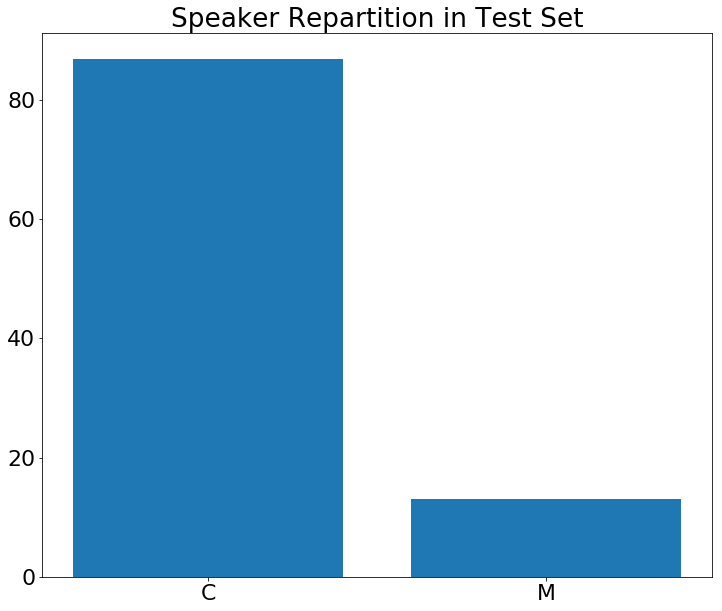

In [9]:
rcParams['figure.figsize'] = 12, 10
mpl.rcParams.update({'font.size': 22})

plt.bar(x=['C', 'M'], height=(labels.value_counts() * 100.0 / labels.shape[0]))
plt.title('Speaker Repartition in Test Set')

In [10]:
sentences_dict[2]

"Dans votre coeur et dans votre vie, la confiance et l'enthousiasme l'emportent sur le doute."

In [11]:
sequences_dict[2]

[18, 53, 165, 4, 18, 53, 99, 0, 3, 169, 4, 5, 1466, 5, 6065, 35, 7, 364, 2]

## Tokenization dict

In [12]:
len(tokenization_dict)

30432

==> 30 432 different words in the whole corpus

In [13]:
df_token = pd.DataFrame({'Words': list(tokenization_dict.keys()), 'Tokens': list(tokenization_dict.values())})

In [14]:
df_token.head()

,Tokens,Words
0,5784,unanimement
1,4714,étienne
2,21804,vedette
3,467,terre
4,3014,promesse


In [15]:
print(df_token.Tokens.min())
print(df_token.Tokens.max())

0
30431


In [16]:
df_token.Tokens.nunique()

30432

In [17]:
s_train = set()
for sent in sequences_dict:
    s_train = s_train | set(sent)
len(s_train)

27929

In [18]:
s_test = set()
for sent in test_sequences_dict:
    s_test = s_test | set(sent)
len(s_test)

15663

In [19]:
print('Number of words in common: ' + str(len(s_train & s_test)))
print('Number of words in Train not in Test: ' + str(len(s_train - s_test)))
print('Number of words in Test not in Train: ' + str(len(s_test - s_train)))

Number of words in common: 13160
Number of words in Train not in Test: 14769
Number of words in Test not in Train: 2503


In [20]:
train_lengths = pd.Series([len(x) for x in sequences_dict])
test_lengths = pd.Series([len(x) for x in test_sequences_dict])

print('---')
print('Distribution of length of sequences in Train:')
print('---')
print(train_lengths.describe())
print('---')
print('Distribution of length of sequences in Test:')
print('---')
print(test_lengths.describe())

---
Distribution of length of sequences in Train:
---
count    45930.000000
mean        26.098955
std         17.211586
min          1.000000
25%         14.000000
50%         22.000000
75%         34.000000
max        437.000000
dtype: float64
---
Distribution of length of sequences in Test:
---
count    11483.000000
mean        26.016459
std         16.739788
min          1.000000
25%         14.000000
50%         22.000000
75%         34.000000
max        157.000000
dtype: float64


/home/pathoumieu/Documents/Deep_Learning_tuto/text_analysis/arturin-deeplearning-test-all/venvv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Histogram of sequences length')

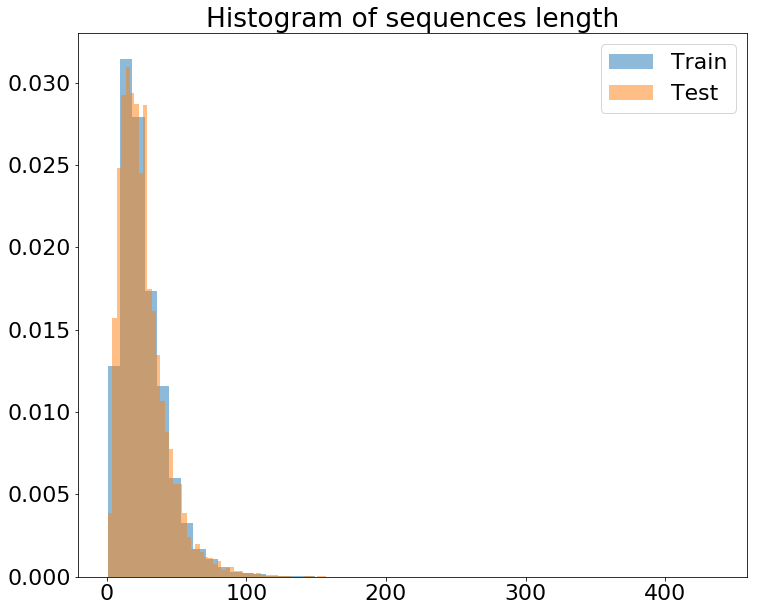

In [21]:
rcParams['figure.figsize'] = 12, 10
mpl.rcParams.update({'font.size': 22})

plt.hist(train_lengths, normed=True, bins=50, alpha=0.5)
plt.hist(test_lengths, normed=True, bins=50, alpha=0.5)
plt.legend(['Train', 'Test'])
plt.title('Histogram of sequences length')

==> Similar distributions with large outliers

In [22]:
train_cumsum = train_lengths.value_counts().sort_index(ascending=True).cumsum() / train_lengths.value_counts().sum()
test_cumsum = test_lengths.value_counts().sort_index(ascending=True).cumsum() / test_lengths.value_counts().sum()

Text(0.5, 1.0, 'ECDF of lengths')

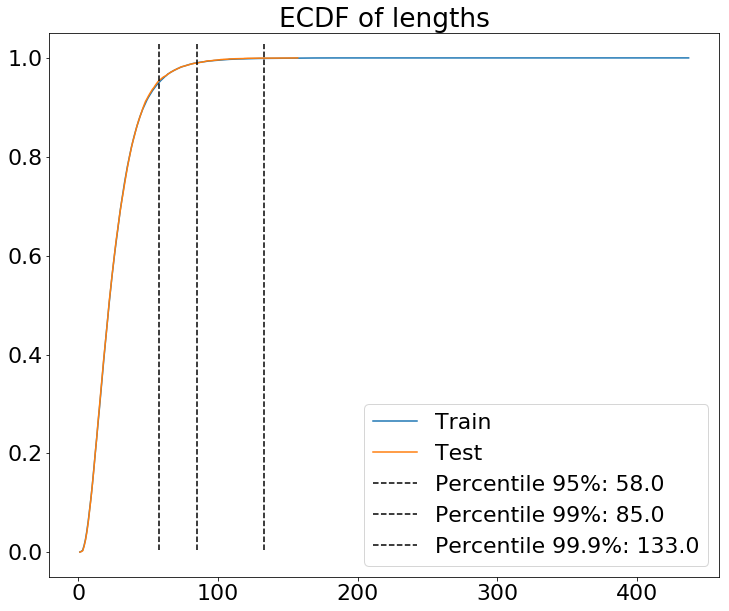

In [23]:
rcParams['figure.figsize'] = 12, 10
mpl.rcParams.update({'font.size': 22})

plt.plot(train_cumsum.index, train_cumsum)
plt.plot(test_cumsum.index, test_cumsum)
perc95 = np.percentile(train_lengths, 95)
perc99 = np.percentile(train_lengths, 99)
perc999 = np.percentile(train_lengths, 99.9)
plt.axvline(x=perc95, linestyle='--', c='k', ymin=0.05, ymax=0.98)
plt.axvline(x=perc99, linestyle='--', c='k', ymin=0.05, ymax=0.98)
plt.axvline(x=perc999, linestyle='--', c='k', ymin=0.05, ymax=0.98)
plt.legend(['Train', 'Test', 
            'Percentile 95%: ' + str(perc95), 
            'Percentile 99%: ' + str(perc99), 
            'Percentile 99.9%: ' + str(perc999)])
plt.title('ECDF of lengths')

==> 95% of sequences length are less than 58 in both Train and Test sets.

==> 99% of sequences length are less than 85 in both Train and Test sets.

==> 99.9% of sequences length are less than 133 in both Train and Test sets.

Consequently, I decide to constrain sequences to 133 maximum length, removing tokens according to their TFIDF representation values in Training set.
If a token from the Test set does not appear in the Training set, its value will be put to 0.0.

See `text_classification/preprocess_sequences.py` for more insights.